## <span style="color:#7B241C"> 1 </span>

In [5]:
# Basic libraries
import pymysql
import pandas as pd # data manipulatioN
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management

# Machine Learning
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder # label encoding
#from sklearn.model_selection import train_test_split # splitting data into train/test sets
#from sklearn.linear_model import LogisticRegression # logistic model
#from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score # logistic metrics
#from sklearn import metrics # more metrics

# Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings
#%matplotlib inline


## <span style="color:#7B241C"> 2</span>.

In [15]:
#Import data from the file 
customer_df=pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv",sep=",") # Paste here the path. 
customer_df.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
1590,TQ32702,Nevada,6990.917824,No,Extended,College,1/27/11,Employed,F,22568,Suburban,Married,88,31,63,0,6,Corporate Auto,Corporate L2,Offer3,Branch,422.400000,Four-Door Car,Medsize
5353,XU49878,Washington,5396.311664,No,Basic,Bachelor,2/14/11,Employed,M,62039,Urban,Married,68,8,30,1,8,Personal Auto,Personal L2,Offer3,Call Center,265.877583,Four-Door Car,Medsize
6048,XM87301,Oregon,2397.536652,No,Basic,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,66,23,1,0,1,Personal Auto,Personal L3,Offer2,Web,596.494439,Four-Door Car,Medsize
2936,JO64487,California,6943.741598,No,Extended,High School or Below,2/24/11,Unemployed,F,0,Suburban,Single,76,4,43,5,2,Special Auto,Special L2,Offer1,Agent,547.200000,Four-Door Car,Large
4237,CO25601,Washington,4112.625047,No,Basic,High School or Below,1/1/11,Unemployed,M,0,Suburban,Single,71,16,90,3,9,Personal Auto,Personal L2,Offer1,Agent,569.761582,Four-Door Car,Medsize
486,FY51713,Arizona,3570.760509,No,Extended,Bachelor,1/7/11,Employed,F,56168,Suburban,Married,88,13,20,0,1,Personal Auto,Personal L1,Offer1,Branch,614.675906,Four-Door Car,Small
518,ZX23819,Oregon,7984.086473,No,Basic,High School or Below,2/10/11,Unemployed,F,0,Suburban,Single,72,1,77,0,2,Personal Auto,Personal L3,Offer2,Call Center,866.208321,Two-Door Car,Large
3799,BR40272,California,8247.952072,No,Premium,College,1/30/11,Employed,M,49009,Suburban,Married,105,17,28,0,7,Personal Auto,Personal L2,Offer2,Branch,504.000000,Four-Door Car,Medsize
531,RD62882,Arizona,6846.150323,Yes,Extended,Bachelor,1/27/11,Unemployed,F,0,Suburban,Divorced,95,13,20,0,5,Personal Auto,Personal L3,Offer1,Call Center,456.000000,Two-Door Car,Large
190,II62831,California,4479.023088,No,Basic,Master,1/29/11,Employed,M,94656,Urban,Married,111,12,79,1,1,Special Auto,Special L2,Offer4,Web,459.738128,SUV,Medsize


## <span style="color:#7B241C"> 3</span>

In [16]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [17]:
customer_df.shape

(9134, 24)

In [18]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## <span style="color:#7B241C"> 4</span>

[PEP8](https://peps.python.org/pep-0008/#prescriptive-naming-conventions)
[PEP484](https://peps.python.org/pep-0484/)

In [19]:
#Standarize column names following PE8
cols = [col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns = cols

In [20]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

## <span style="color:#7B241C"> 5</span>

In [23]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')
customer_df.sample(4)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [28]:
customer_df.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## <span style="color:#7B241C"> 6</span>

In [24]:
df_numeric=customer_df.select_dtypes(include=["float", "int"])
#df_bool=customer_df.select_dtypes(include=["bool"])
df_object=customer_df.select_dtypes(include=[object]) 

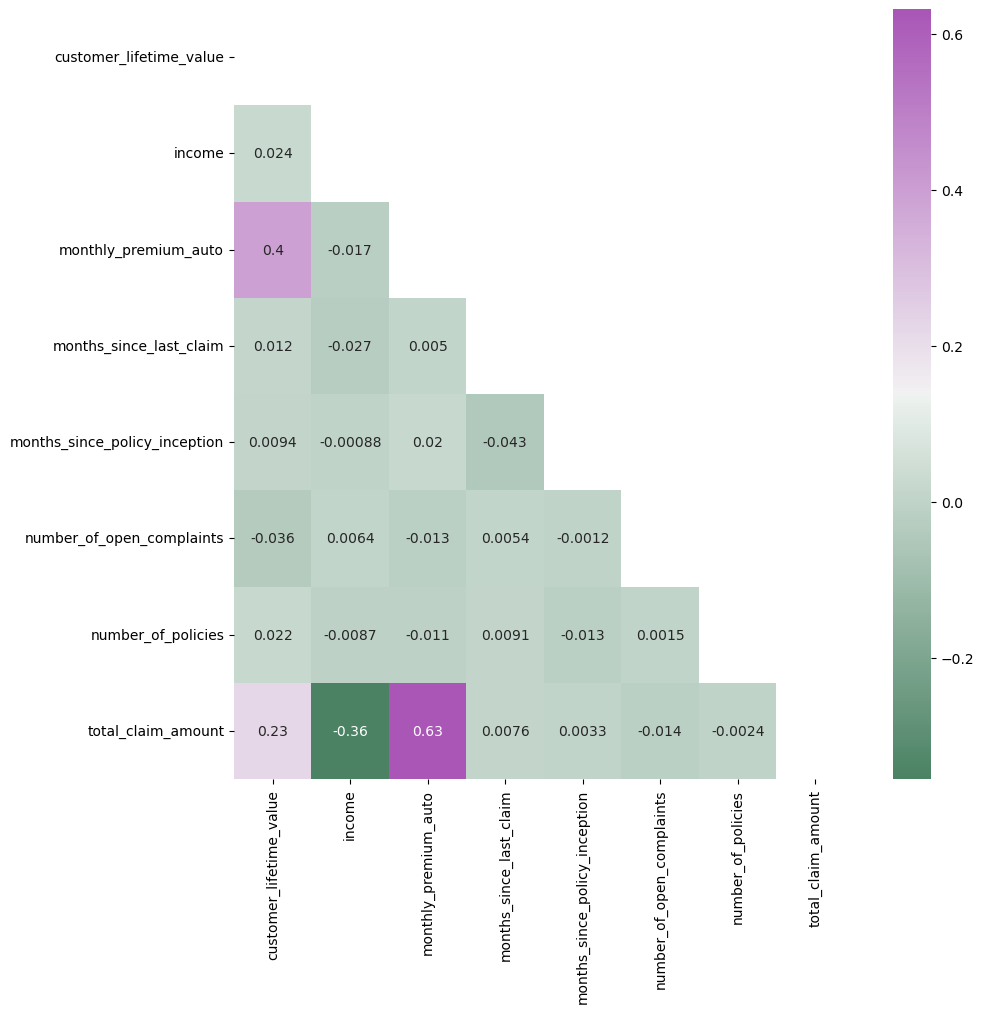

In [25]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

>Most variables are independent. 
Total claim amount has a slightly more correlation to customer lifertime value but not strong. 
A bit stronger negative correlation with income. 
some correlation with monthly premium auto 
monthly premium auto has some correlation with customer life time value but not strong 

## <span style="color:#7B241C"> 7</span>

**Histograms**
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the histogram of the different numeric variables 
</div>

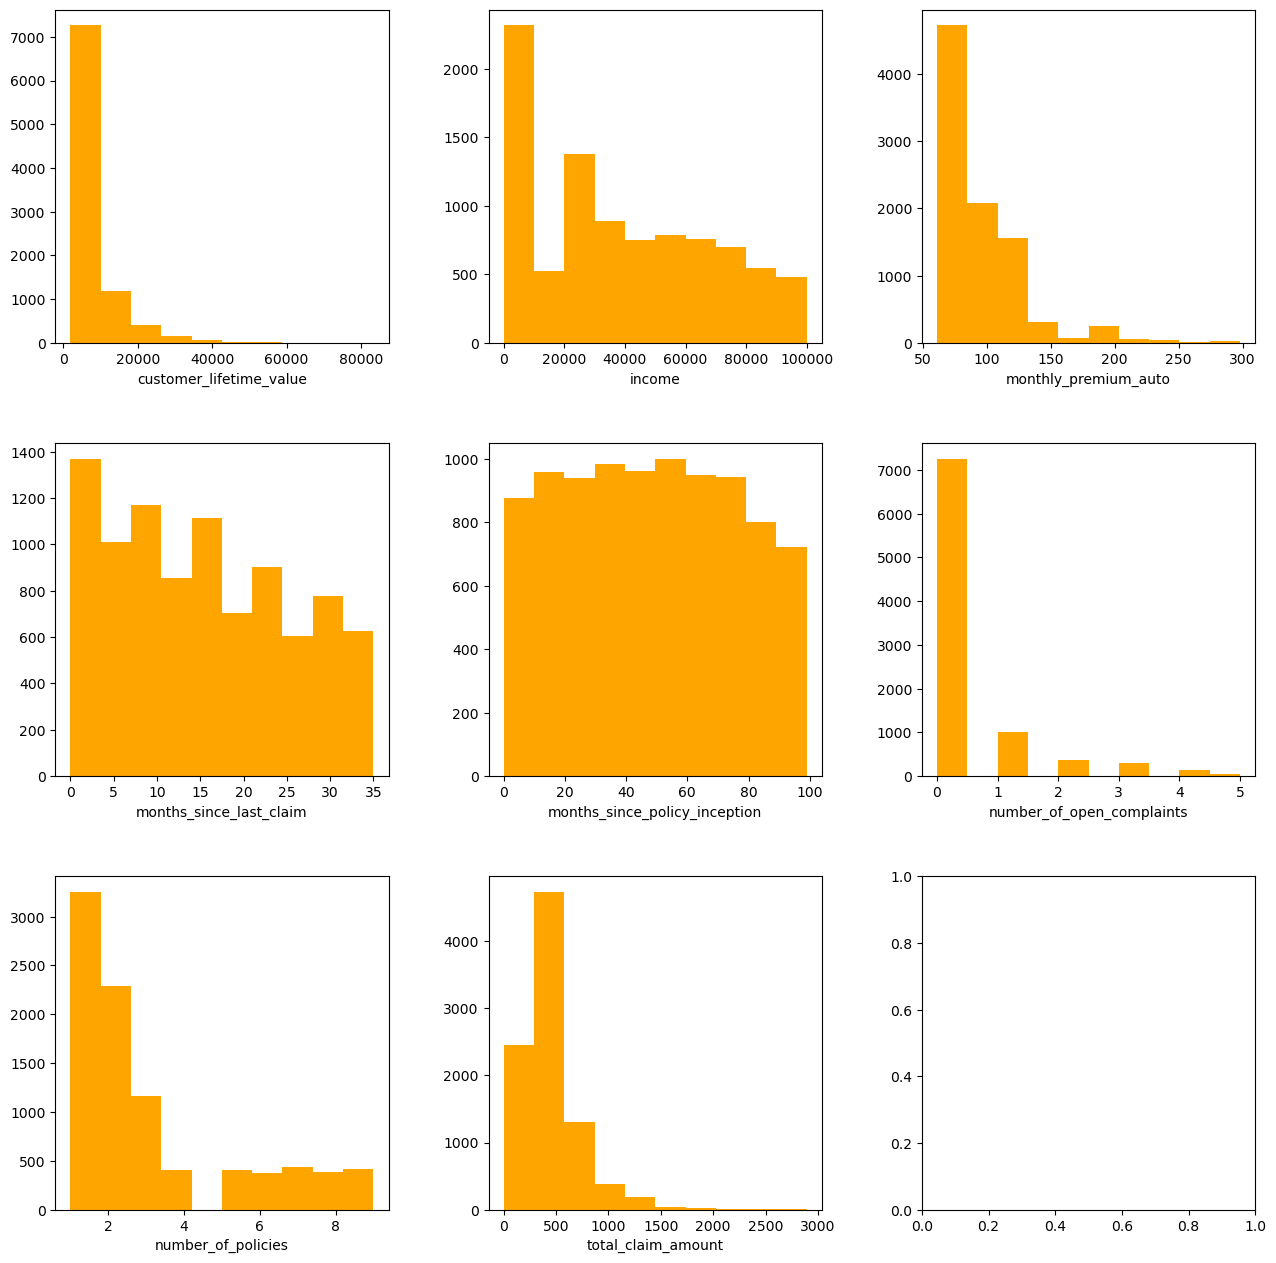

In [23]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each histogram in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.hist(df_numeric[column], color='orange')
    ax.set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

(<Figure size 1500x1500 with 9 Axes>, array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))


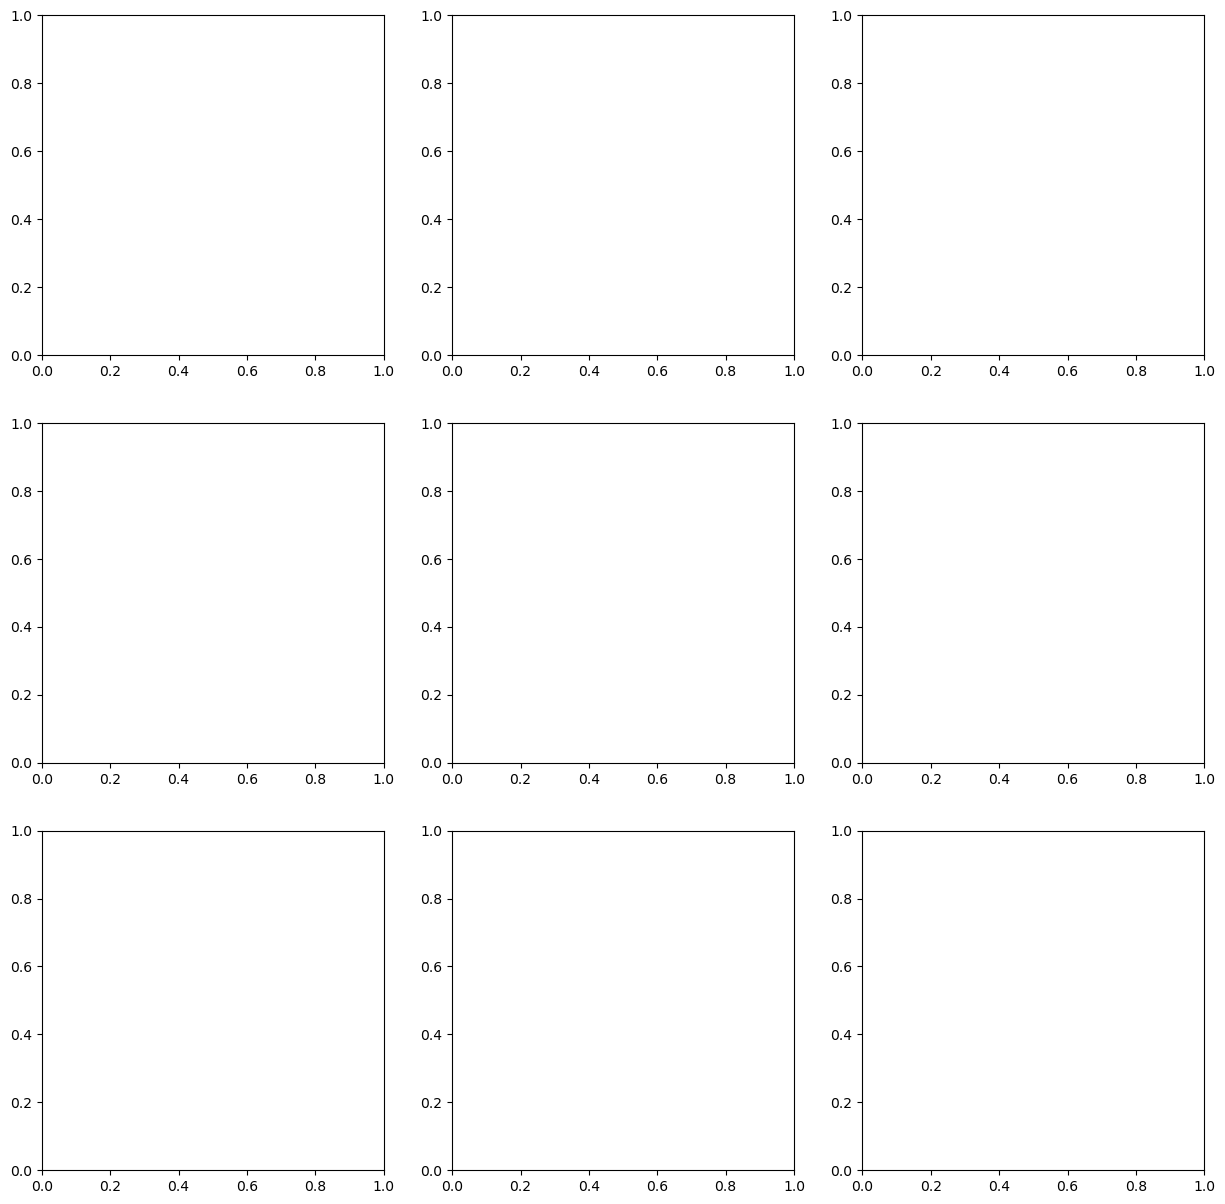

In [38]:
print(plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows)))

**Distributions**

<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the distributions of the different numeric variables 
</div>

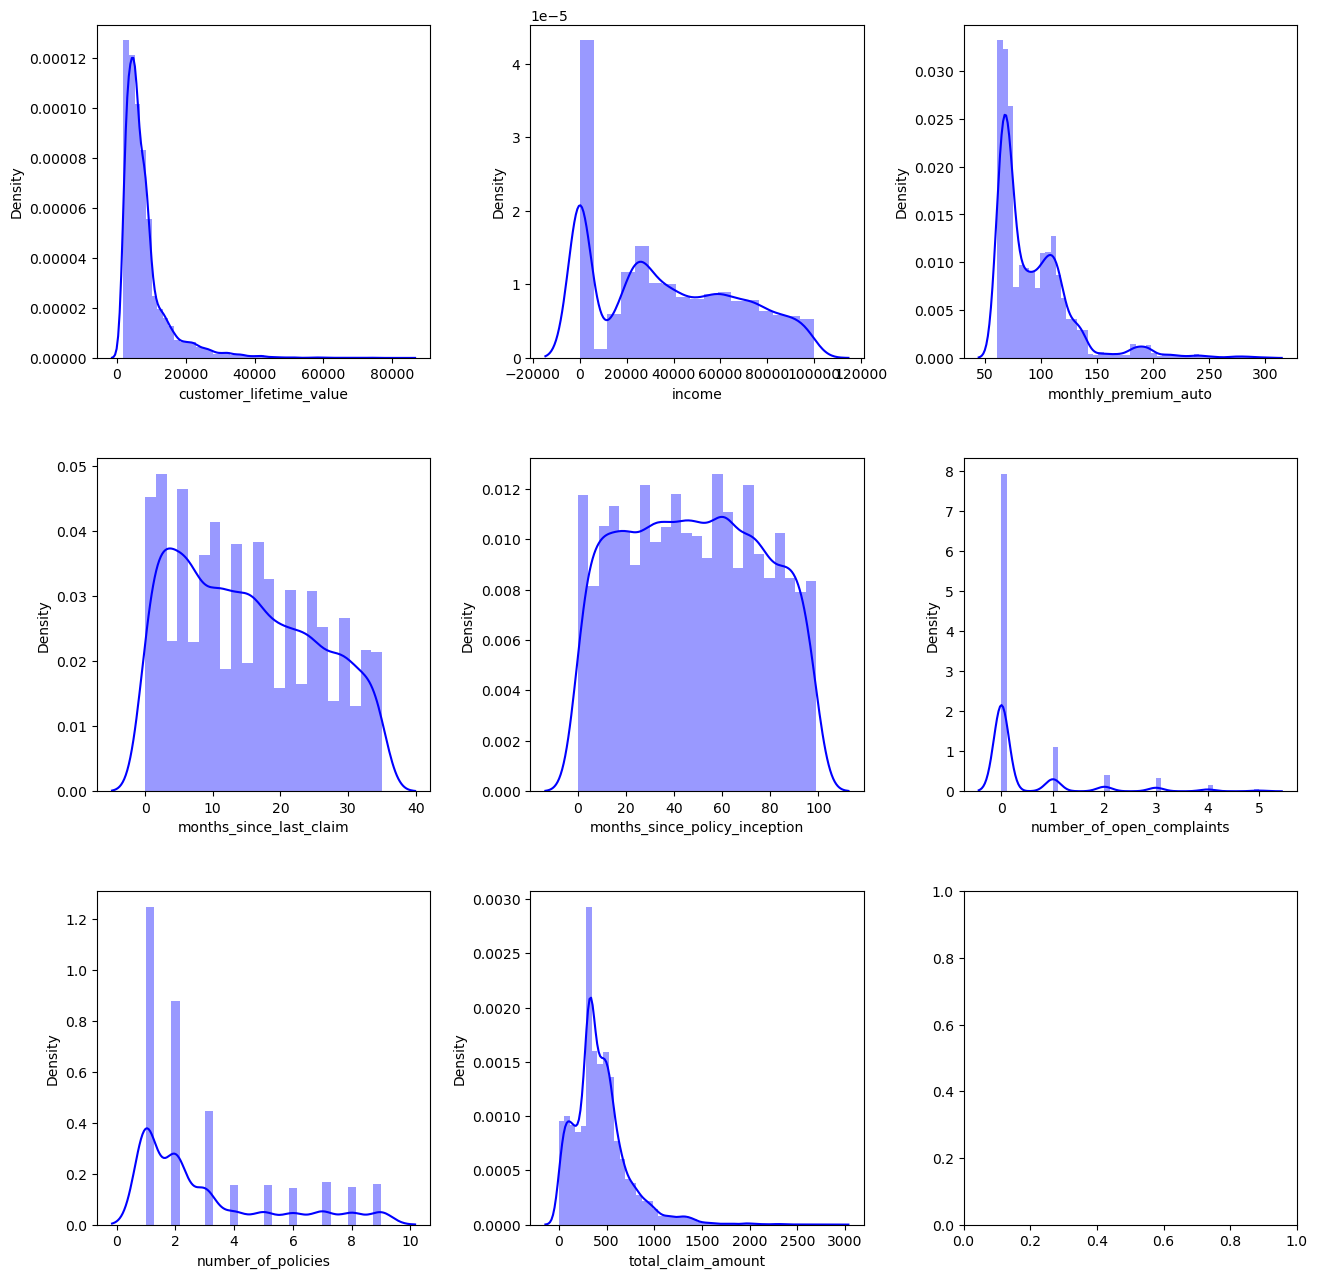

In [24]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

## <span style="color:#7B241C"> 8 </span>.

In [26]:
df_object=df_object.drop(columns=['customer'])
#Check unique values for each categorical value
for column in df_object.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  state  has  5  categories 
 The single values are:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Here the detail: 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64



This feature  response  has  2  categories 
 The single values are:  ['No' 'Yes']
Here the detail: 
 No     7826
Yes    1308
Name: response, dtype: int64



This feature  coverage  has  3  categories 
 The single values are:  ['Basic' 'Extended' 'Premium']
Here the detail: 
 Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64



This feature  education  has  5  categories 
 The single values are:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Here the detail: 
 Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64



This feature  employmentstatus  has  5  categ

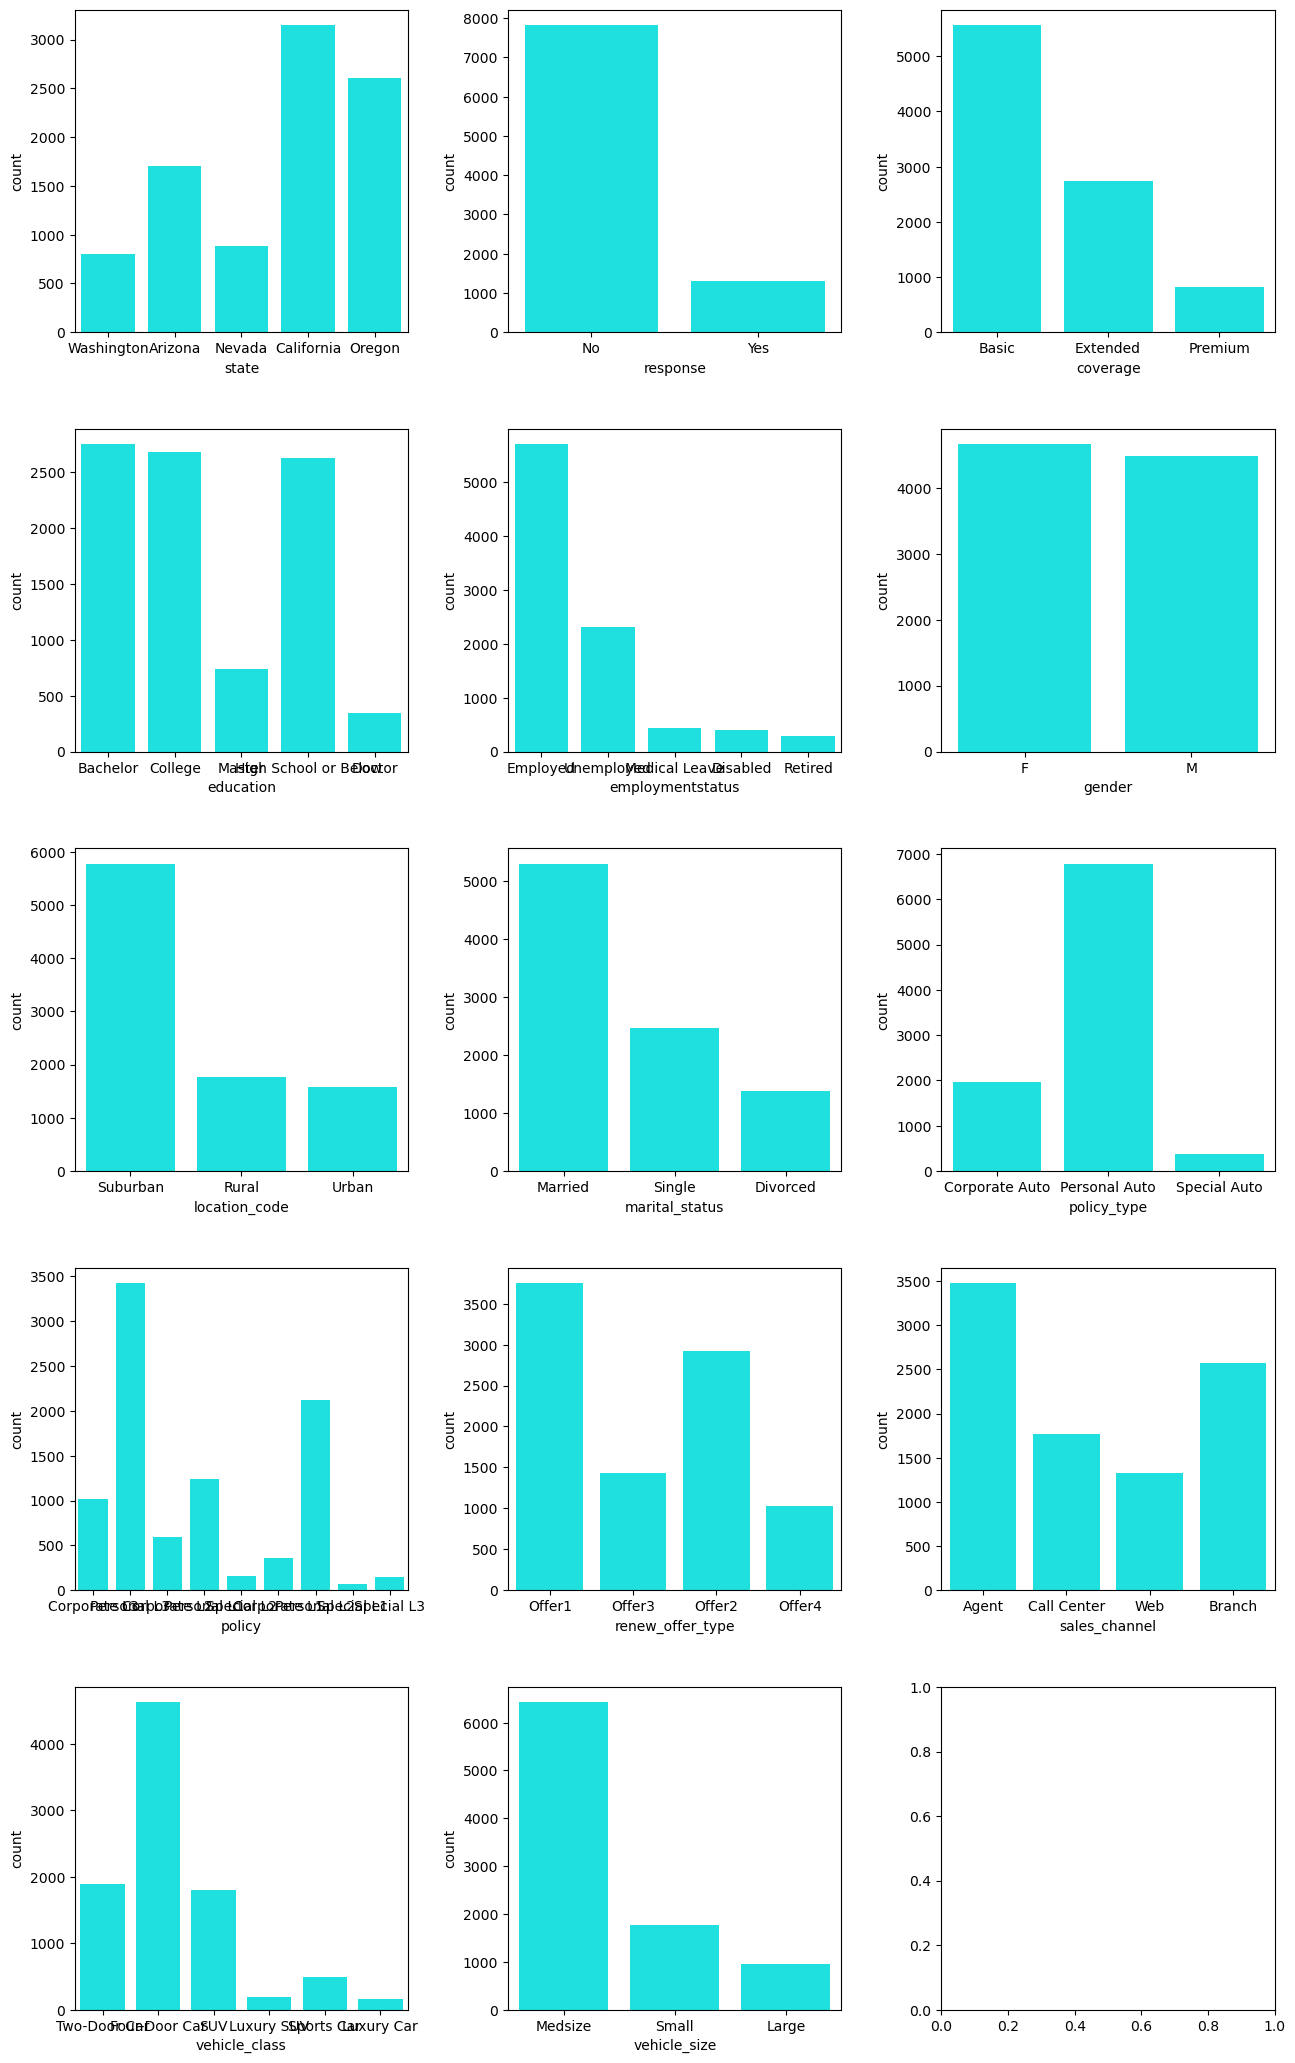

In [27]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_object.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_object.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.countplot(x=df_object[column], ax=axes[row_idx, col_idx], color='cyan')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

## <span style="color:#7B241C"> 9 </span>.

**Boxplots**

<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the boxplots of the different numeric variables 
</div>

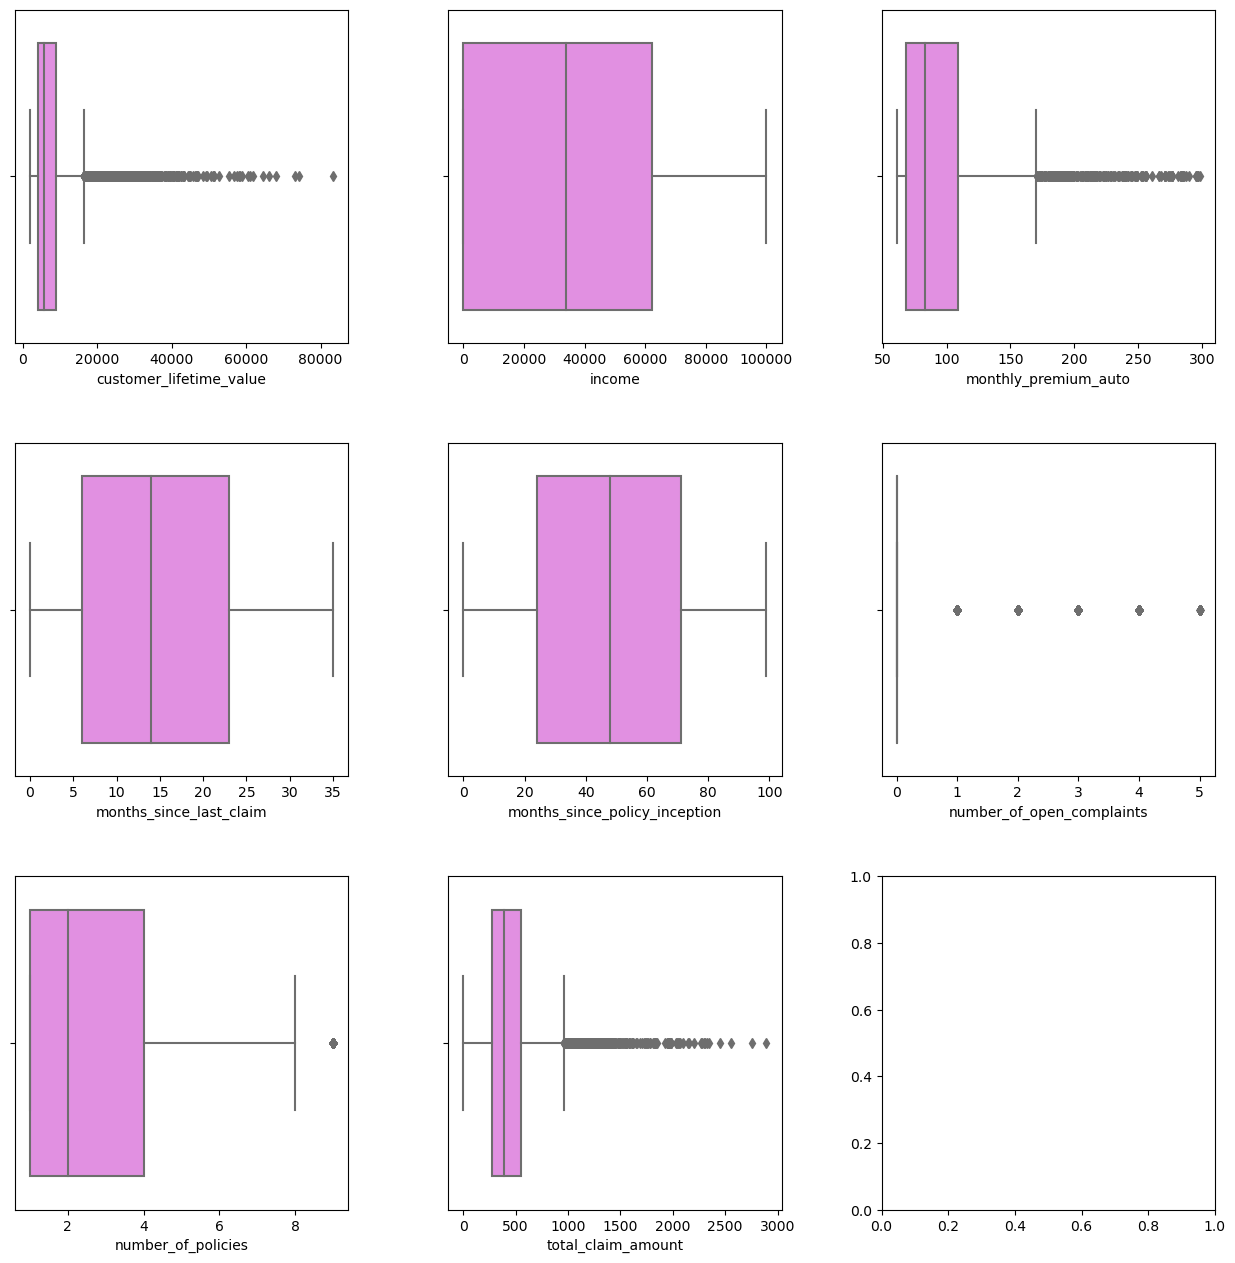

In [25]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [26]:
for column in df_numeric.columns:
    iqr = np.percentile(df_numeric[column],75) - np.percentile(df_numeric[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(df_numeric[column],75) + 1.5*iqr
    lower_limit = np.percentile(df_numeric[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(df_numeric.loc[(df_numeric[column]>upper_limit) | (df_numeric[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  customer_lifetime_value  | Upper limit:  16414.039911750002  | Lower limit:  -3457.6210762500014
Number of exclusions would be  817

Feature name:  income  | Upper limit:  155800.0  | Lower limit:  -93480.0
Number of exclusions would be  0

Feature name:  monthly_premium_auto  | Upper limit:  170.5  | Lower limit:  6.5
Number of exclusions would be  430

Feature name:  months_since_last_claim  | Upper limit:  48.5  | Lower limit:  -19.5
Number of exclusions would be  0

Feature name:  months_since_policy_inception  | Upper limit:  141.5  | Lower limit:  -46.5
Number of exclusions would be  0

Feature name:  number_of_open_complaints  | Upper limit:  0.0  | Lower limit:  0.0
Number of exclusions would be  1882

Feature name:  number_of_policies  | Upper limit:  8.5  | Lower limit:  -3.5
Number of exclusions would be  416

Feature name:  total_claim_amount  | Upper limit:  960.3997301249999  | Lower limit:  -140.62664687499995
Number of exclusions would be  453


>In the information above we can see the interquartile limits and how many outliers would be removed in case we remove everything. 
>there are some negative numbers in the lower limis. This doesn´t make sense for some varibales like income that can not be negative. 
>with all the outliers make sense to question ourselves if a removal make sense or not. Some exclusions may lead to a lack of data. For example when removing number_of_open_complaints. 1882 will be removed. this is too much.

## <span style="color:#7B241C"> 10 </span>

In [36]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [28]:
null_columns = customer_df.columns[customer_df.isna().sum() != 0].tolist()
print("\n\n\nNumerical columns that contains null values: \n ",null_columns,"\n nulls have been replaced 0\n\n\n")




Numerical columns that contains null values: 
  [] 
 nulls have been replaced 0





>There is no null values